# Remote Health Monitoring System
## Comparison of various ML algorithms to predict diabetes 


In [ ]:
import io
import pandas as pd
import numpy as np

df = pd.read_csv('diabetes.csv')
print(df.head()) # Examine first columns
print ("") # spacing for better reading
print (df.columns) # All the columns, we'll work with, they are formatted correctly 
# Dataset is now stored in a Pandas Dataframe

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
print (df.info())
# we have 9 columns and 768 rows

print ("")

print (df.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   7

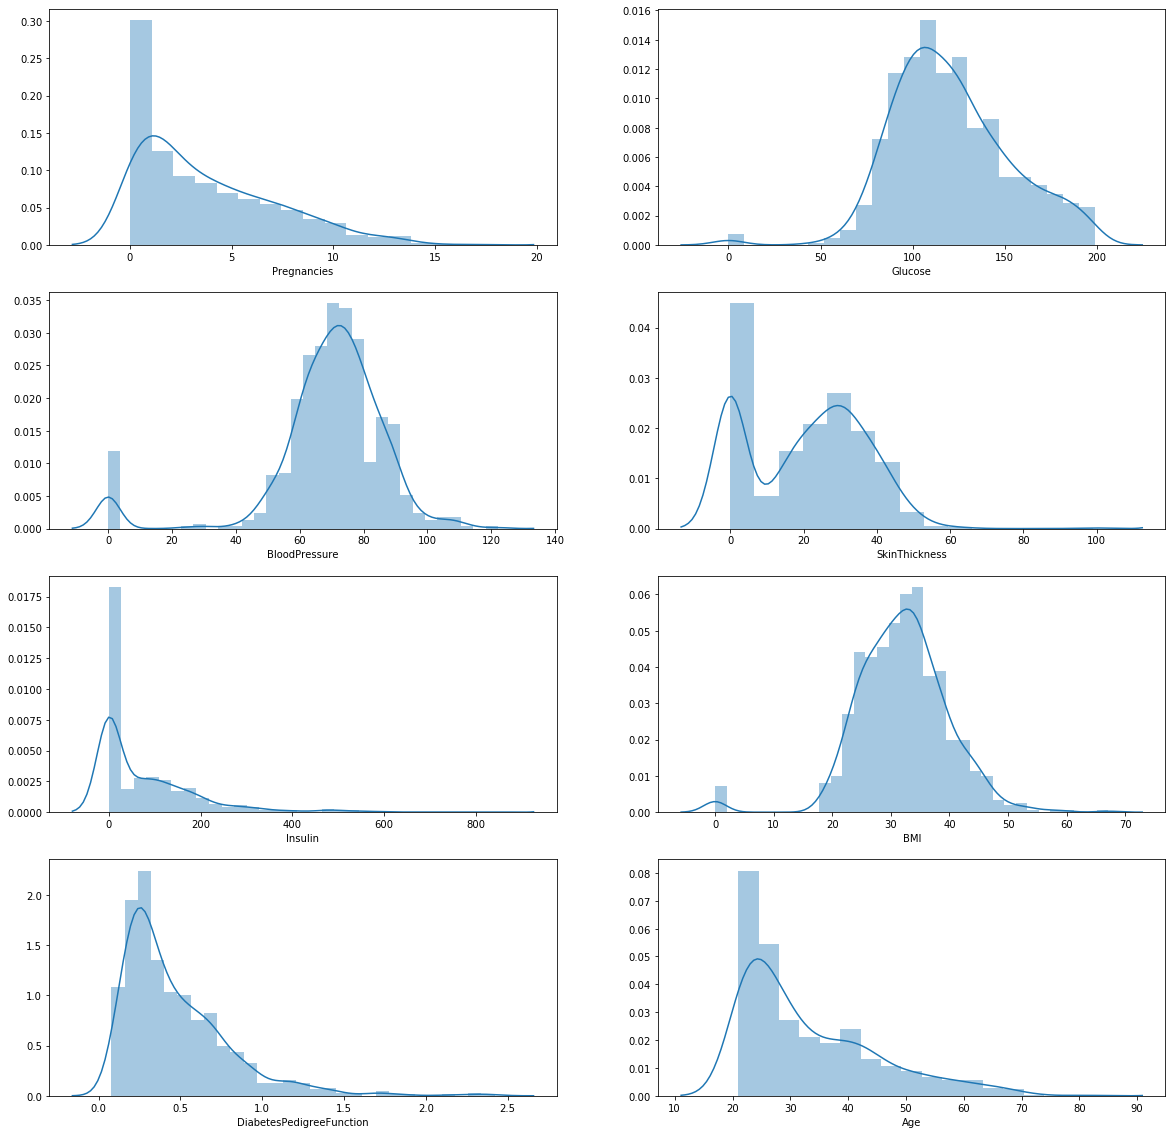

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, ax=axes[0,0])
sns.distplot(df.Glucose, ax=axes[0,1])
sns.distplot(df.BloodPressure, ax=axes[1,0])
sns.distplot(df.SkinThickness, ax=axes[1,1])
sns.distplot(df.Insulin, ax=axes[2,0])
sns.distplot(df.BMI, ax=axes[2,1])
sns.distplot(df.DiabetesPedigreeFunction, ax=axes[3,0])
sns.distplot(df.Age, ax=axes[3,1])

In [ ]:
df.SkinThickness.replace(0, df.SkinThickness.median(), inplace=True)
df.Insulin.replace(0, df.Insulin.median(), inplace=True)
df.Glucose.replace(0, df.Glucose.median(), inplace=True)
df.BloodPressure.replace(0, df.BloodPressure.median(), inplace=True)
df.BMI.replace(0, df.BMI.median(), inplace=True)

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


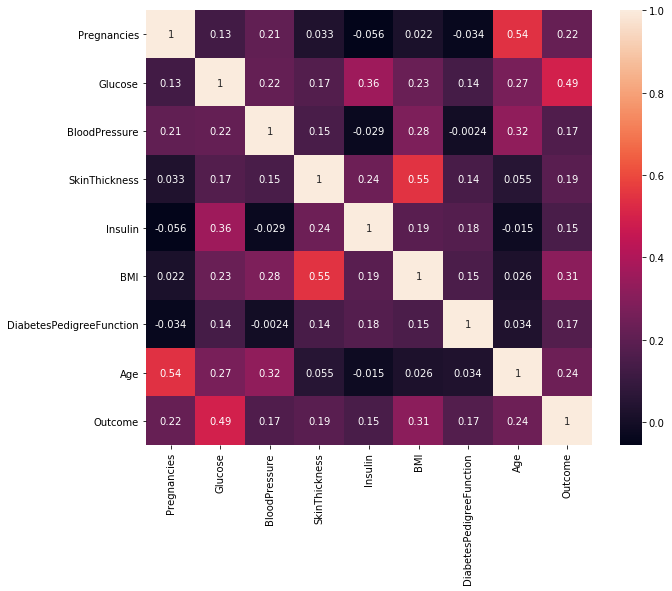

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(df.corr(), annot=True, ax = ax)

As can be seen from the correlation table and maps, Glucose levels had the highest impact on outcome. As expected the number of pregnancies were largely related to the age of a female.

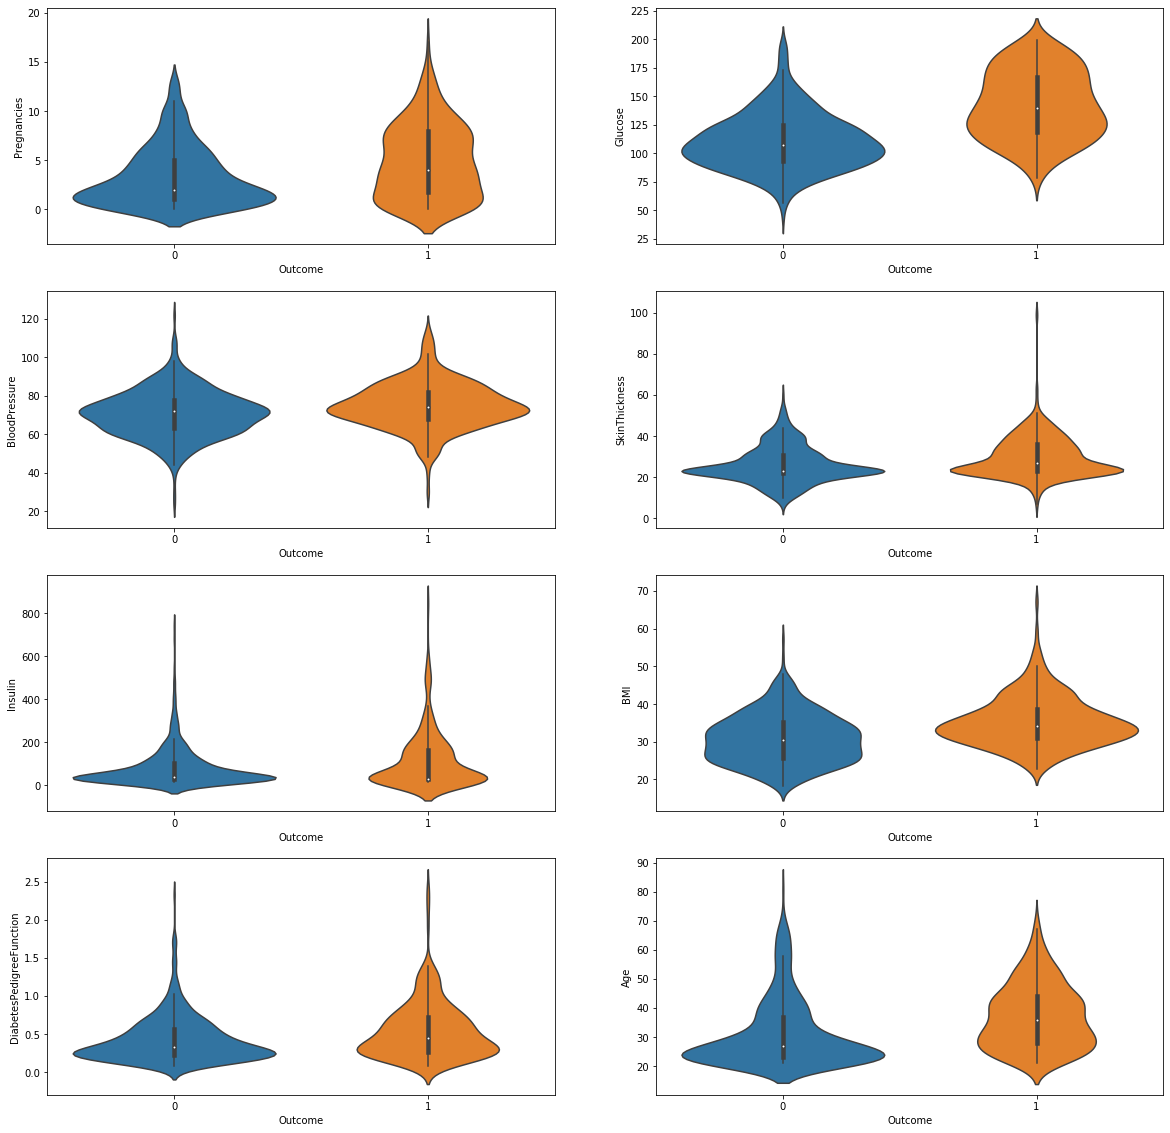

In [ ]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.violinplot(x=df.Outcome ,y=df.Pregnancies, ax=axes[0,0])
sns.violinplot(x=df.Outcome ,y=df.Glucose, ax=axes[0,1])
sns.violinplot(x=df.Outcome ,y=df.BloodPressure, ax=axes[1,0])
sns.violinplot(x=df.Outcome ,y=df.SkinThickness, ax=axes[1,1])
sns.violinplot(x=df.Outcome ,y=df.Insulin, ax=axes[2,0])
sns.violinplot(x=df.Outcome ,y=df.BMI, ax=axes[2,1])
sns.violinplot(x=df.Outcome ,y=df.DiabetesPedigreeFunction, ax=axes[3,0])
sns.violinplot(x=df.Outcome ,y=df.Age, ax=axes[3,1])

Skin Thickness, Insulin, Blood Pressure, Glucose and Body-Mass Index have no null values but some values are 0(not possible). We can replace these values with the median values of these parameters.

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Outcome==0]
df_minority = df[df.Outcome==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=500,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Outcome.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [ ]:
y = df_upsampled['Outcome'].values # target
X = df_upsampled.drop('Outcome', axis = 1).values # predictors
print (y)
print (X) ; print ("")
print (type(X))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn.model_selection import train_test_split
# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 123)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# random forest test

# Instantiate classifier
forest = RandomForestClassifier(n_estimators = 180,random_state=123,n_jobs=-1,max_depth=10) 

# fit on training data
forest.fit(X_train, y_train)

# Seeing the metrics
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
rf_clf_train_score = forest.score(X_train, y_train)
rf_clf_test_score = forest.score(X_test, y_test)

Accuracy on training set: 0.993
Accuracy on test set: 0.935


In [ ]:
from sklearn.svm import SVC

# Support vector machines test

# Instantiate classifier
svc = SVC(kernel = "rbf",random_state=0) # changed to "linear"

# fit on training data
svc.fit(X_train, y_train)

# Seeing the metrics
print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))
svc_clf_train_score = svc.score(X_train, y_train)
svc_clf_test_score = svc.score(X_test, y_test)

Accuracy on training set: 0.838
Accuracy on test set: 0.830


Accuracy on training set: 0.965
Accuracy on test set: 0.835


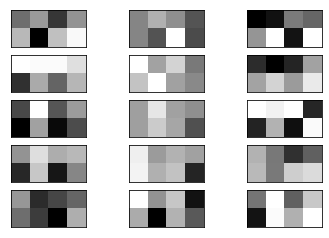

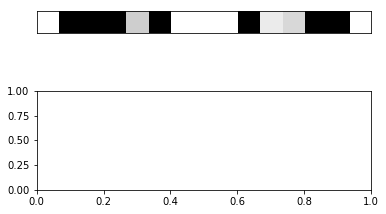

In [ ]:
from sklearn.neural_network import MLPClassifier

# Neural Network test

# Instantiate classifier
nn_clf = MLPClassifier(hidden_layer_sizes=(15),activation='logistic',solver='lbfgs',max_iter=200, random_state=123)



# fit on training data
nn_clf.fit(X_train, y_train)



# Seeing the metrics
print("Accuracy on training set: {:.3f}".format(nn_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nn_clf.score(X_test, y_test)))
nn_clf_train_score = nn_clf.score(X_train, y_train)
nn_clf_test_score = nn_clf.score(X_test, y_test)

fig, axes = plt.subplots(5, 3)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = nn_clf.coefs_[0].min(), nn_clf.coefs_[0].max()
for coef, ax in zip(nn_clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(2, 4), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
    
plt.show()
fig, axes = plt.subplots(2,1)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = nn_clf.coefs_[1].min(), nn_clf.coefs_[1].max()
for coef, ax in zip(nn_clf.coefs_[1].T, axes.ravel()):
    ax.matshow(coef.reshape(1, 15), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()

gnb_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gnb_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gnb_clf.score(X_test, y_test)))
gnb_clf_train_score = gnb_clf.score(X_train, y_train)
gnb_clf_test_score = gnb_clf.score(X_test, y_test)

Accuracy on training set: 0.736
Accuracy on test set: 0.755


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Using decision tree classifier

#Instantiation
dt_clf = DecisionTreeClassifier(max_depth=10,random_state=123)

# Fit on training data
dt_clf.fit(X_train, y_train)

# Accuracy measurements
print("Accuracy on training set: {:.3f}".format(dt_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt_clf.score(X_test, y_test)))
dt_clf_train_score = dt_clf.score(X_train, y_train)
dt_clf_test_score = dt_clf.score(X_test, y_test)

Accuracy on training set: 0.949
Accuracy on test set: 0.835


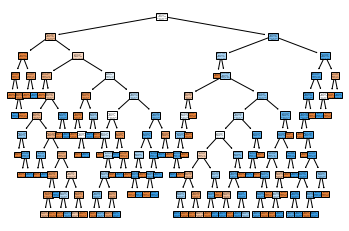

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
fn=['Preg.','Glucose','BP','Skin','Insulin','BMI','DPF','Age']
cn=['0','1']
tree.plot_tree(dt_clf)
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,35), dpi=300)
tree.plot_tree(dt_clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
train_scores = [rf_clf_train_score,svc_clf_train_score,nn_clf_train_score,gnb_clf_train_score,dt_clf_train_score]
test_scores = [rf_clf_test_score,svc_clf_test_score,nn_clf_test_score,gnb_clf_test_score,dt_clf_test_score]
classifiers = ['Random Forest','Support Vector Machine','Neural Network','Naive Bayes','Decision Tree']
for_plot = pd.DataFrame ([train_scores, test_scores], columns=classifiers, index=['Train Score', 'Test Score'])
for_plot=for_plot.T
print(for_plot)

                        Train Score  Test Score
Random Forest               0.99250       0.935
Support Vector Machine      0.83750       0.830
Neural Network              0.96500       0.835
Naive Bayes                 0.73625       0.755
Decision Tree               0.94875       0.835


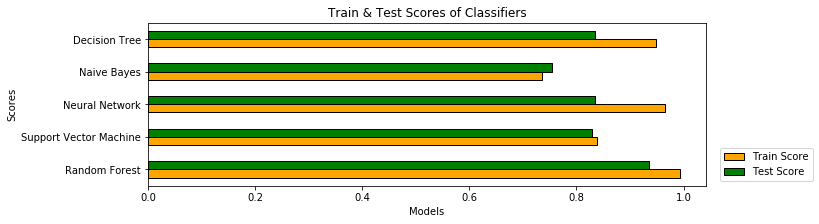

In [ ]:
import matplotlib.pyplot as plt
for_plot.plot(kind='barh', figsize=(10,3), color=['orange','green'], edgecolor='black')

plt.title('Train & Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(loc='lower right' , bbox_to_anchor=(1.2, 0))
plt.show()